# Exercises
In this notebook I will make the exercises of chapter 4 in the lecture notes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lecture 1
These exercises are concerned with random number generators and Monte Carlo integration. 

### Exercise 1: Non-uniform random numbers
Monte Carlo simulations are based on random sampling of the quantities to compute. This sampling relies upon a random number generator (RNG). Most high level lan- guages (java, C++, Matlab, ...) contain RNGs that generate (quasi-)random numbers uniformly between 0 and 1. For instance in Matlab (or Octave) this is done by the function rand(). In Matlab one also has randn(), which generates random numbers from a Gaussian distribution. In many Monte Carlo problems it is important to generate non-uniform random numbers. This exercise presents two different ways to do so.

Let us suppose that we want to generate random numbers with a given distribution $f(x)$. Here $f(x)\geq 0 $ and it is normalized, $\int_{-\infty}^{+\infty}f(x)dx=1$ . Examples are $f(x) = e^{−x}$ in the interval $[0, +\infty)$ (and zero otherwise), or $f (x) = 1 − x^2$ in $[−1, 1]$.

We consider the cumulative distribution function:
$$ F(x) = \int_{-\infty}^x f(x)dx $$
for which $0 < F(x) \leq 1$. If we now draw random numbers $x_i$ from the uniform distribution in $[0,1]$ then the random numbers $y_i = F^{−1}(x_i) $ will be distributed with probability density $f(x)$. To show this is easy and left to you as exercise.
This first approach requires that the function $f(x)$ can be integrated analytically and that $F (x)$ can be inverted. This is not the case for instance for $f(x) = e^{−x^2}/\sqrt{\pi}$.
Another way to generate random number with a given distribution $f(x)$ on a finite interval (meaning that $f (x) \neq 0$ only in some interval $[a, b]$ is the hit-and-miss method. Let $f(x)$ be defined in $[a,b]$ and let $M$ such that $M > f(x)$ for every $x$ in $[a,b]$. We now generate two random numbers $t$ and $s$ uniformly distributed in $[a,b]$ and $[0,M]$, respectively. The case $s > f(t)$ corresponds to a miss and the generated numbers are neglected. If instead $s \leq f(t)$, we keep and store the value of $t$, which is the output of our RNG algorithm. Note that $s$ is only a checking variable and its value is not returned.
Note: the hit-and-miss method has a drawback. All the misses are generated and not actually used. This is a waste of computer resources.

#### Questions
1. Using uniform random numbers in the interval $[0, 1]$ and the inverse cumulative distribution function as defined in $$ F(x) = \int_{-\infty}^x f(x)dx $$ and generate random numbers (plot the histograms) which are distributed

- uniformly in $[−2, 1]$
- exponentially in $\mathbb{R}^+: f(x)=e^{−x}$ for $x\geq0$ and $f(x)=0$ for $x<0$.
- linearly in the interval $[−1, 1]:f(x) = (x + 1)/2$ and zero elsewhere.

2. Using the hit-and-miss method generate random numbers (plot the histograms) which are distributed
- linearly in the interval $[−1, 1]: f (x) = (x + 1)/2$ and zero elsewhere.
- distributed as $f (x) = −x(1 − x)e^{−x^2}\log(1 − x)$ in $[0, 1]$.
3.  Using the hit-and-miss method generate random points in a two-dimensional plane uniformly distributed inside a circle of radius $R = 1$.
4. Generate the same uniform distribution (without the hit-and-miss method) using an appropriate distribution function $f(r,\theta)$, where $r$ and $\theta$ are polar coordinates.



In [ ]:
# 1 using Uniform RNs, generate non-uniform RNGs using inverse cumulative distribution function
# Uniform in [-2, 1]
n_sam = 1000000 #number of samples
a = -2
b = 1
random_points = np.random.uniform(a, b, n_sam)

plt.hist(random_points, 20)
plt.suptitle(r"Uniform RNs in $[-2,1]$", fontsize=18)
plt.title(str(n_sam)+' samples', fontsize=13)
plt.ylabel('Counts')
plt.xlabel('x')
plt.savefig('Plots/UniformRNG.png', dpi=200)
plt.show()


In [ ]:
# 1 using Uniform RNs, generate non-uniform RNGs using inverse cumulative distribution function
# exponentially in R+
n_sam = 100000

def exp_RN(n):
    # Generate n uniform random numbers between 0 and 1
    URN = np.random.uniform(0, 1, n)
    
    # inverse CDF transformation
    random_numbers = -np.log(1 - URN)
    return random_numbers
random_points = exp_RN(n_sam)

plt.hist(random_points, 25)
plt.suptitle(r"Exponential RNs in $[0,+\infty)$", fontsize=18)
plt.title(str(n_sam)+' samples', fontsize=13)
plt.ylabel('Counts')
plt.xlabel('sampled x-value')
plt.savefig('Plots/exponentialRNG_hist.png', dpi=200)
plt.show()



In [ ]:
n_sam = 100000

def exp_RN(n):
    # Generate n uniform random numbers between 0 and 1
    URN = np.random.uniform(0, 1, n)
    
    # inverse CDF transformation
    random_numbers = -np.log(1 - URN)
    return random_numbers
random_points = exp_RN(n_sam)

def f(x):
    return np.exp(-x)
x = np.linspace(0, 15, 1000)

plt.plot(x, f(x), color='red', label='Distribution')
plt.hist(random_points, 25, density=True, label='Samples')
plt.suptitle(r"Exponential RNs in $[0,+\infty)$", fontsize=18)
plt.title(str(n_sam)+' samples, normalised', fontsize=13)
plt.ylabel('Counts')
plt.xlabel('sampled x-value')
plt.legend()
plt.savefig('Plots/exponentialRNG_hist_density.png', dpi=200)
plt.show()

In [ ]:
# 1 using Uniform RNs, generate non-uniform RNGs using inverse cumulative distribution function
# exponentially in R+
n_sam = 100000

def aff_RN(n):
    # Generate n uniform random numbers between 0 and 1
    URN = np.random.uniform(0, 1, n)
    
    # inverse CDF transformation
    random_numbers = np.sqrt(4*URN)-1
    return random_numbers
random_points = aff_RN(n_sam)

def f(x):
    return (x+1)/2
x = np.linspace(-1, 1, 1000)

plt.hist(random_points, 20)
plt.suptitle(r"RNs in $[1,1]: f(x) = (x+1)/2$", fontsize=18)
plt.title(str(n_sam)+' samples', fontsize=13)
plt.ylabel('Counts')
plt.xlabel('x')
plt.savefig('Plots/exponentialRNG_hist.png', dpi=200)
plt.show()


In [ ]:
plt.hist(random_points, 20, density=True, label='samples')
plt.suptitle(r"RNs in $[1,1]: f(x) = (x+1)/2$", fontsize=18)
plt.plot(x, f(x), color='red', label='Distribution')
plt.title(str(n_sam)+' samples, normalized', fontsize=13)
plt.ylabel('Normalized Counts')
plt.xlabel('x')
plt.legend()
plt.savefig('Plots/linearRNG_hist_density.png', dpi=200)
plt.show()

In [ ]:
# 2. hit & miss method

a = -1
b = 1 
M = 1.1

def f(x):
    return (x+1)/2

n_sam = 100000
i = 0
random_points = np.zeros(n_sam)
while i < n_sam:
    t = np.random.uniform(a, b, 1)
    s = np.random.uniform(0, M, 1)
    if s[0] <= f(t[0]):
        random_points[i] += t[0]
        i += 1
    else: 
        i += 0

x = np.linspace(a, b, 1000)
f = f(x)

plt.hist(random_points, 20, label='samples', density=True)
plt.plot(x, f, label='pdf')
plt.title(r"Linear RNs in $[-1,1]$")
plt.ylabel('Normalized counts')
plt.xlabel('Sampled values')
plt.legend()
plt.savefig('Plots/ex1_hit_and_miss_linear.png', dpi=200)
plt.show()


In [ ]:
# 2. hit & miss method

a = 0
b = 1 
M = 2

def f(x):
    '''
    Niet genormaliseerd!
    '''
    return -x*(1-x)*np.exp(-x**2)*np.log(1-x)/0.0901135

n_sam = 100000
i = 0
random_points = np.zeros(n_sam)
while i < n_sam:
    t = np.random.uniform(a, b, 1)
    s = np.random.uniform(0, M, 1)
    if s[0] <= f(t[0]):
        random_points[i] += t[0]
        i += 1
    else: 
        i += 0

x = np.linspace(a+0.01, b-0.01, 1000)
f = f(x)
        
plt.hist(random_points, 20, label = 'samples', density=True)
plt.plot(x, f, label='pdf')
plt.title(r"RNs from PDF $f(x)=-x(1-x)e^{-x^2}\log(1-x)$ in $[0,1]$")
plt.ylabel('Counts')
plt.xlabel('x')
plt.legend()
plt.savefig('Plots/ex1_hit_and_miss_rare_functie.png', dpi=200)
plt.show()


The plotted line has the right shape, but not the correct normalization. This is due to the fact that the function $f(x)$ is not normalized.

In [ ]:
# unit circle

a = -1
b = 1

def f(x, y):
    return np.sqrt(x**2 + y**2)
N=100000
i=0

while i < N:
    pass
    
    

In [ ]:
R = 1  
N = 10000

# Hit-and-Miss Method
def hit_and_miss(N, R):
    points = []
    while len(points) < N:
        x, y = np.random.uniform(-R, R, 2)  
        if x**2 + y**2 <= R**2:  
            points.append((x, y))
    return np.array(points)

# Using f(r, θ)
def polar_sampling(N, R):
    r = np.sqrt(np.random.uniform(0, 1, N)) * R  
    theta = np.random.uniform(0, 2 * np.pi, N)  
    x = r * np.cos(theta)  
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Generate points
points_hit_and_miss = hit_and_miss(N, R)
points_polar = polar_sampling(N, R)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
x = np.linspace(-1, 1, 1000)
half_circle = np.sqrt(1-x**2)
axes[0].plot(x, half_circle, color='black', label='Circle')
axes[0].plot(x, -half_circle, color='black')
axes[0].scatter(points_hit_and_miss[:, 0], points_hit_and_miss[:, 1], s=5, color='blue', label='Sampled points')
axes[0].set_title('Hit-and-Miss Method')
axes[0].set_xlim(-R*1.1, R*1.1)
axes[0].set_ylim(-R*1.1, R*1.1)
axes[0].set_xlabel('x-value', fontsize=13)
axes[0].set_ylabel('y-value', fontsize=13)
axes[0].set_aspect('equal')
axes[0].legend()

axes[1].plot(x, half_circle, color='black', label='Circle')
axes[1].plot(x, -half_circle, color='black')
axes[1].scatter(points_polar[:, 0], points_polar[:, 1], s=5, color='green')
axes[1].set_title('Polar Sampling Method')
axes[1].set_xlim(-R*1.1, R*1.1)
axes[1].set_ylim(-R*1.1, R*1.1)
axes[1].set_xlabel('x-value', fontsize=13)
axes[1].set_ylabel('y-value', fontsize=13)
axes[1].set_aspect('equal')
axes[1].legend()

plt.tight_layout()
plt.savefig('Plots/ex1_circles.png', dpi=200)
plt.show()


### Exercise 2: RNGs from transformations

In this exercise we generate random numbers according to a certain distribution, starting from only a uniform random number generator.

A way to generate random numbers from a Gaussian distribution is by the so-called Box-Muller transformation. Suppose that we have two numbers $x$ and $y$ drawn from a standard Gaussian distribution. Their combined density function then becomes
$$
f(x,y)dxdy = \frac{1}{2\pi} \exp\left(-\frac{x^2+y^2}{2}\right)dxdy
$$
Transforming this into polar coordinates gives
$$
f (r, \theta)drd\theta = \frac{1}{2\pi} \exp\left(-\frac{r^2}{2}\right)drd\theta
$$
So generating random numbers $r$ and $\theta$ according to above distribution and transforming them back to cartesian coordinates would yield two random numbers $x$ and $y$ which are standard Gaussian distributed. The $θ$ angle is drawn from a uniform distribution in $[0, 2\pi]$. The $r$-dependent part is solvable as before, since here we can calculate and invert the cumulative density function:
$$
F(R)= \int_0^r \exp \left(-\frac{z^2}{2}\right)zdz
$$
So generating a uniform $\theta$, and a $r$ by inverting $F(r)$ allows us to compute two independent Gaussian random numbers $x$ and $y$ by making the transformation from polar to cartesian coordinates.


Questions
- Program the above algorithm and show that this indeed generates couples of normally distributed random variables.
- How do we need to adapt the algorithm if we want the random numbers to be distributed according to a Gaussian distribution with average $\mu$ and variance $\sigma^2$?

We first invert the expression for r, to have r gaussianly distributed. This gives
$$ r = \sqrt{-2\ln(u)} $$ where u is uniformly distributed in $[0,1]$. 

In [ ]:
def Box_Muller(n):
    # Generate two uniform random numbers
    u = np.random.uniform(0, 1, n)
    v = np.random.uniform(0, 1, n)

    # transform to r and theta
    r = np.sqrt(-2*np.log(u))
    theta = 2*np.pi* v

    # transform back to x, y
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

def twoD_gaussian(x, y):
    return 1/(2*np.pi)*np.exp(-(x**2+y**2)/2)  

def gaussian(n, mu, sigma):
    return 1/np.sqrt(2*np.pi)*np.exp(-(n-mu)**2/2/sigma**2)/sigma

In [ ]:
# generate some numbers and plot the 3D histogram of their distribution.
n_sam = int(1E6)
x, y = Box_Muller(n_sam)


# Create histogram of samples
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=15, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.savefig('Plots/ex2_gaussian_RNG.png', dpi=200)
plt.show()


We can also combine both $x$ and $y$ to create one array of samples drawn from the distribution $\mathcal{N}(0,1)$. 

In [ ]:
# create one array
sam = np.array([x,y])
samples = sam.flatten()

# plotting
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.hist(samples, 25, density=True, label='Normalized density, 25 bins')

# add analytical gaussian
x = np.linspace(-5, 5, 1000)
gauss = gaussian(x, 0, 1)
ax.plot(x, gauss, color='red', label='Gaussian distribution')
ax.set_xlabel('Sampled values', fontsize=13)
ax.set_ylabel('Normalized counts', fontsize=13)
fig.suptitle('Gaussian RNG', fontsize=18)
ax.set_title(str(len(samples))+' samples')
ax.legend()
fig.savefig('Plots/GaussianRNG_normalized.png', dpi=200)

To adapt the algorithm such that we can specify a mean $\mu$ and a variance $\sigma^2$, we go through the same procedure: first we write down the probability density function for two random numbers $x$ and $y$ drawn from a gaussian $\mathcal{N}(\mu, \sigma^2)$ 
$$
f(x,y)dxdy = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{(x-\mu)^2+(y-\mu)^2}{2\sigma^2}\right)dxdy
$$
Now we first do a transformation
$$
t = \frac{x-\mu}{\sigma}, s = \frac{y-\mu}{\sigma}
$$
This gives
$$
f(t,s)dtds = \frac{1}{2\pi} \exp\left(-\frac{t^2+s^2}{2}\right)dtds
$$
Transforming this into polar coordinates gives
$$
f (r, \theta)drd\theta = \frac{1}{2\pi} \exp\left(-\frac{r^2}{2}\right)drd\theta
$$

So the only thing we need to do is add a small last transformation to the previous function. We know that both $x$, $y$ are now generated randomly so we can 

In [ ]:
def Box_Muller_general(n, mu, sigma):
    # Generate two uniform random numbers
    u = np.random.uniform(0, 1, n)
    v = np.random.uniform(0, 1, n)

    # transform to r and theta
    r = np.sqrt(-2*np.log(u))
    theta = 2*np.pi* v

    # transform back to x, y
    t = r*np.cos(theta)
    s = r*np.sin(theta)

    # transform back to x, y
    x = sigma*t+mu
    y = sigma*t+mu
    return x, y

In [ ]:
# generate some samples and plot them
mu = 10
sigma = 10
x, y = Box_Muller_general(n_sam, mu, sigma)

n = np.linspace(mu-5*sigma, mu+5*sigma, 1000)
fn = gaussian(n, mu, sigma)

# Create two plots for x, y
fig, ax = plt.subplots(1,2, figsize=(18, 6))
ax[0].hist(x, 50, label='Sampled x-values', density=True)
ax[0].plot(n, fn, color='red', label='Normal distribution pdf')
ax[0].axvline(mu, color='grey', linestyle='dashed', label='mean')
ax[0].set_title('x', fontsize=20)
ax[0].set_xlabel('Sampled x-values', fontsize=20)
ax[0].set_ylabel('counts', fontsize=20)
ax[0].legend()
# ax[0].plot(n, fn, color='orange', label='gaussian pdf')

ax[1].hist(y, 50, label='sampled y-values', density=True)
ax[1].axvline(mu, color='grey', linestyle='dashed', label='mean')
ax[1].plot(n, fn, color='red', label='Normal distribution pdf')
ax[1].set_title('y', fontsize=20)
ax[1].set_xlabel('Sampled y-values', fontsize=20)
ax[1].set_ylabel('counts', fontsize=20)
ax[1].legend()
# ax[1].plot(n, fn, color='orange', label='gaussian pdf')

fig.suptitle(r'Gaussian RN ~ $\mathcal{N}(\mu=10, \sigma=10)$', fontsize=25)
fig.savefig('Plots/GaussianRNG_x_y_separate.png', dpi=200)

### Exercise 3: Monte Carlo integration I

In this exercise we will compute integrals numerically, with the help of random numbers. This method of interation is particularly interesting for high-dimensional integrals. For example, in my master thesis I am working on the simulation and data analysis of a particular source of gravitational waves. For parameter estimation a Bayesian framework is adopted, which requires the calculation of a normalization factor which is the marginalization of the likelihood. Since the EMRI waveform models depend on no less than 14 parameters (17 in the most general case), this is a very high-dimensional integral and in this kind of applications a fast way to numerically evaluate these integrals is necessary, especially when no analytical methods are available.

In this exercise we will estimate the value of the following integral:
$$
\mathcal{I} = \int_{-\infty}^{+\infty}\exp\left(-\frac{r^2}{2}\right) (x + y + z)^2 dxdydz
$$
where $r^2 = x^2 + y^2 + z^2$.
To perform the calculation we take the factor $e^{−r^2/2}$ as a density function on the domain of the integral. When doing so, one has to be careful with the normalization factor. This integral can also be calculated analytically, and also using another type of Monte Carlo sampling based on the Metropolis algorithm. We compare these different methods.

#### Analytical solution
To solve this integral analytically, we first do a coordinate transformation to spherical coordinates: $(x,y,z)\to (r, \theta, \phi)$.
- $x = r\cos(\theta)\sin(\phi)$
- $y= r\sin(\theta)\sin(\phi)$
- $z =r\cos(\phi)$
  
where we have the bounds $r\in [0, +\infty)$, $\theta \in [0, 2\pi]$ and $\phi\in [0,\pi]$.

Doing this transformation yield the integral 
$$ 
\mathcal{I} = \int_0^{+\infty} \int_0^\pi \int
$$


__verdere oplossing: zie papieren__

#### Gaussian RNG
We use a gaussian RNG to generate $x, y, z$ and we use these to compute the integral using this method.

The biased random number generator is in this case the following function:
$$
W(x_n, y_n, z_n) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{x_n^2}{2})\frac{1}{\sqrt{2\pi}}\exp(-\frac{y_n^2}{2})\frac{1}{\sqrt{2\pi}}\exp(-\frac{z_n^2}{2})
$$
which simplifies to
$$
W(\vec{x}_n) = \frac{1}{\sqrt{2\pi}^3}\exp(-\frac{\vec{x}_n^2}{2})
$$
Now we approximate the integral as
$$
\mathcal{I} \simeq \frac{1}{N}\sum_{n=1}^N\frac{f(\vec{x}_n)}{W(\vec{x}_n)} = \frac{1}{N}\sum_{n=1}^N\frac{
\exp\left(-\frac{x_n^2+y_n^2+z^2_n}{2}\right) (x_n + y_n + z_n)^2
}{\frac{1}{\sqrt{2\pi}}\exp(-\frac{x_n^2}{2})\frac{1}{\sqrt{2\pi}}\exp(-\frac{y_n^2}{2})\frac{1}{\sqrt{2\pi}}\exp(-\frac{z_n^2}{2})}
$$
reducing this to 
$$
\mathcal{I}\simeq \frac{1}{N}\sum_{n=1}^N\sqrt{2\pi}^3(x_n^2+y_n^2+z_n^2)
$$
For this we only need to sample $x_n, y_n, z_n$ from a normal distribution with $\mu=0, \sigma=1$. Doing this results in the following block of code.

In [ ]:
# generate gaussian random numbers
n_sam = 1E6
x = np.random.normal(0, 1, int(n_sam))
y = np.random.normal(0, 1, int(n_sam))
z = np.random.normal(0, 1, int(n_sam))

integral = 0
for i in range(int(n_sam)):
    integral += (x[i]+y[i]+z[i])**2
val_sam = 1/n_sam*(integral)*np.sqrt(2*np.pi)**3

We now compare both the anaytical and exact result.

In [ ]:
val_exact = 12*np.pi*np.sqrt(2*np.pi)/2

print(r"The sampled value is: ", round(val_sam,5))
print(r"The exact value is:   ", round(val_exact,5))

#### Variance 
We calculate the variance $\sigma^2$ of the sampled values for different numbers of sampled points $N$. By plotting the results we can show that the variance relates to the number of points as $\sigma^2 \sim \frac{1}{N}$.

In [ ]:
def get_variance(array):
    mu = np.sum(array)/len(array)
    var = 1/len(array)*np.sum((array-mu)**2)
    return var

N = np.linspace(1E4, 1E6, 10)
variances = np.zeros(len(N))


for i in range(len(N)):
    x = np.random.normal(0, 1, int(10**(i/2)))
    y = np.random.normal(0, 1, int(10**(i/2)))
    z = np.random.normal(0, 1, int(10**(i/2)))
    samples = np.ravel(np.array([x, y, z]))
    var_sam = get_variance(samples)
    variances[i] += val_sam


fig, ax = plt.subplots(1,1)
ax.plot(N, variances)
print(variances)

It is impossible to use $(x+y+z)^2$ as the distribution since it not normalizable. Since each of the $x,y,z$ can be any real number, we can never integrate this to a finite value and therefore it is not suited to use this as the sampling distribution.

### Exercise 4: Monte Carlo integration II

Here we repeat the calculation of the same integral using a different Monte Carlo method: the Metropolis algorithm. We need for this purpose to define a Markov chain characterized by some transition probabilities $P(\vec{r} \to \vec{r}')$. We would like that the “dynamics” so defined converges to the distribution $\omega(\vec{r}) = (2\pi)^{-3/2}\exp(-r^2/2)$.

We know that if we require detailed balance, i.e. that the rates for any pairs of points $\vec{r}$ and $\vec{r}'$ fulfil
$$
q(\vec{r})P(\vec{r}\to\vec{r}') = q(\vec{r}')P(\vec{r}'\to\vec{r})
$$
then the dynamics converge to the distribution $q(\vec{r})$. Therefore we choose the transition probabilities such that we have 
$$
\frac{P(\vec{r}\to\vec{r}')}{P(\vec{r}'\to\vec{r})} = \frac{\omega(\vec{r}')}{\omega(\vec{r})} = \exp \left(-\frac{r'^2-r^2}{2}\right)
$$

The transition probabilities are usually split as $P(\vec{r}\to\vec{r}') = g(\vec{r}\to\vec{r}')A(\vec{r}\to\vec{r}')$ where $g$ is the selection probability and $A$ the acceptance ratio.
The $g$ is generated as follows: starting from an initial point $\vec{r}$ we select a new point $\vec{r}' = \vec{r}+ \vec{\delta}$ where $\delta = (\delta_x, \delta_y, \delta_z)$ is a random shift and the three components are independently chosen from $W_h(\delta)$ a uniform distribution centered in $0$ and of width $h$

$$ W_h(\delta) = \begin{cases} 
          1/h & \text{if } |\delta|<h/2 \\
          0 & \text{otherwise}
       \end{cases}
$$
The acceptance ratio for the Metropolis algorithm is given by:

$$
A(\delta) = \begin{cases}
                1 & \text{if } r'^2-r^2<0 \\
                \exp\left(-\frac{r'^2-r^2}{2}\right) & \text{otherwise}
            \end{cases}
$$
Shortly: we jump to a new site and accept this jump if the new site is closer to the
origin. If we are further away from the origin we accept the jump with a probability
$\exp(−\frac{r'^2−r^2}{2} ) < 1$.

In [2]:
def acceptance_rate(r_new, r_old):
    distance = np.sqrt(np.sum(r_new**2)) - np.sqrt(np.sum(r_old**2))
    if distance < 0:
        return 1
    else:
        return np.exp(-distance/2)

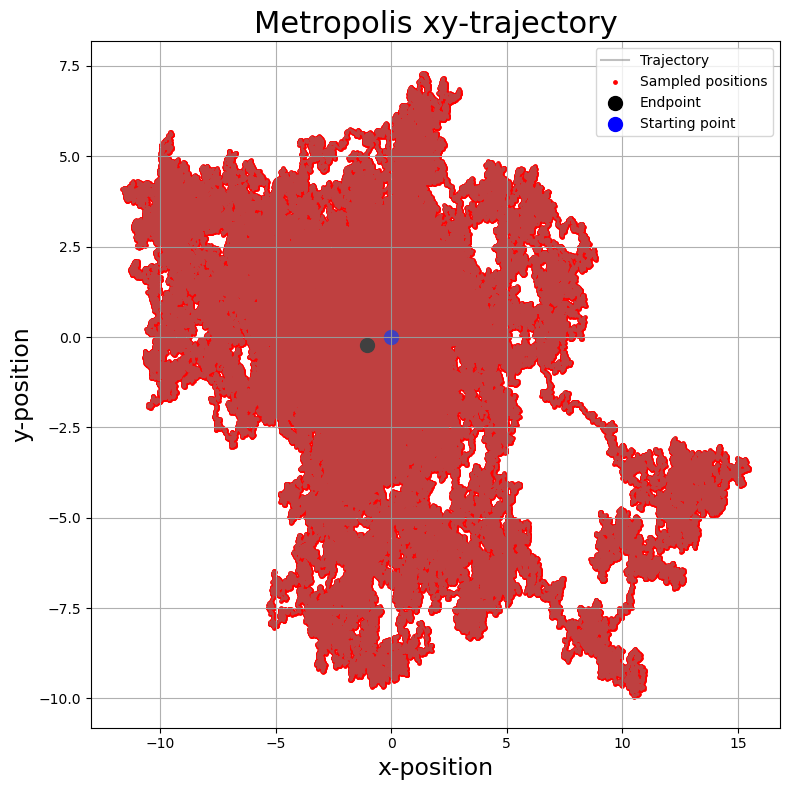

In [3]:
N = 1E6
r_initial_origin = np.array([0,0,0])

h = 0.1
n = 0

# keep track of all positions
positions_x = np.zeros(int(N))
positions_y = np.zeros(int(N))
positions_z = np.zeros(int(N))

positions_x[0] += r_initial_origin[0]
positions_y[0] += r_initial_origin[1]
positions_z[0] += r_initial_origin[2]

while n<N-1:
    # Generate step from W_h
    delta_x = np.random.uniform(-h/2, h/2, 1)
    delta_y = np.random.uniform(-h/2, h/2, 1)
    delta_z = np.random.uniform(-h/2, h/2, 1)
    delta = np.array([delta_x, delta_y, delta_z]).flatten()

    #get new and old positions
    x_old = positions_x[n]
    y_old = positions_y[n]
    z_old = positions_z[n]
    
    r_old = np.array([x_old, y_old, z_old]).flatten()
    r_new = np.add(r_old, delta)
    
    # Metropolis algorithm
    u = np.random.uniform(0, 1, 1)
    A = acceptance_rate(r_new, r_old)
    n += 1
    if A == 1 or u <= A : # accept jump
        positions_x[n] += r_new[0]
        positions_y[n] += r_new[1]
        positions_z[n] += r_new[2]
    else:                # reject jump
        positions_x[n] += r_old[0]
        positions_y[n] += r_old[1]
        positions_z[n] += r_old[2]

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_xlabel('x-position', fontsize=17)
ax.set_ylabel('y-position', fontsize=17)
ax.set_title('Metropolis xy-trajectory', fontsize=22)
ax.plot(positions_x, positions_y, color='gray', alpha=0.5, label='Trajectory')
ax.scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
ax.scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=100, label='Endpoint')
ax.scatter(positions_x[0], positions_y[0], color='blue', marker='o', s=100, label='Starting point')
ax.grid()
ax.legend()
# fig.savefig('Plots/ex4MC_trajectory_h='+str(h)+'_origin.png', dpi=300)
plt.tight_layout()

In [ ]:
# make large plot for h=1, 0.1 and different starting points

fig, ax = plt.subplots(2,2, figsize=(14,12))
for i in range(2):
    for j in range(2):
        if i == 0 and j == 0:
            N = 1E4
            r_initial_origin = np.array([0,0,0])

            h = 0.1
            n = 0

            # keep track of all positions
            positions_x = np.zeros(int(N))
            positions_y = np.zeros(int(N))
            positions_z = np.zeros(int(N))

            positions_x[0] += r_initial_origin[0]
            positions_y[0] += r_initial_origin[1]
            positions_z[0] += r_initial_origin[2]

            while n<N-1:
            # Generate step from W_h
                delta_x = np.random.uniform(-h/2, h/2, 1)
                delta_y = np.random.uniform(-h/2, h/2, 1)
                delta_z = np.random.uniform(-h/2, h/2, 1)
                delta = np.array([delta_x, delta_y, delta_z]).flatten()

            #get new and old positions
                x_old = positions_x[n]
                y_old = positions_y[n]
                z_old = positions_z[n]
    
                r_old = np.array([x_old, y_old, z_old]).flatten()
                r_new = np.add(r_old, delta)
    
                # Metropolis algorithm
                u = np.random.uniform(0, 1, 1)
                A = acceptance_rate(r_new, r_old)
                n += 1
                if u < A:
                    positions_x[n] += r_new[0]
                    positions_y[n] += r_new[1]
                    positions_z[n] += r_new[2]
                else: 
                    positions_x[n] += r_old[0]
                    positions_y[n] += r_old[1]
                    positions_z[n] += r_old[2]
            ax[i,j].set_xlabel('x-position', fontsize=13)
            ax[i,j].set_ylabel('y-position', fontsize=13)
            ax[i,j].set_title('starting in origin, h = 1', fontsize=18)
            ax[i,j].plot(positions_x, positions_y, color='gray', alpha=0.5, label='Trajectory')
            ax[i,j].scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
            ax[i,j].scatter(positions_x[0], positions_y[0], color='blue', marker='o', s=100, label='Starting point')
            ax[i,j].scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=100, label='Endpoint')
 
            ax[i,j].grid()
            ax[i,j].legend()
            
        if i == 0 and j == 1:
            N = 1E4
            r_initial_origin = np.array([0,0,0])

            h = 0.1
            n = 0

            # keep track of all positions
            positions_x = np.zeros(int(N))
            positions_y = np.zeros(int(N))
            positions_z = np.zeros(int(N))

            positions_x[0] += r_initial_origin[0]
            positions_y[0] += r_initial_origin[1]
            positions_z[0] += r_initial_origin[2]

            while n<N-1:
            # Generate step from W_h
                delta_x = np.random.uniform(-h/2, h/2, 1)
                delta_y = np.random.uniform(-h/2, h/2, 1)
                delta_z = np.random.uniform(-h/2, h/2, 1)
                delta = np.array([delta_x, delta_y, delta_z]).flatten()

            #get new and old positions
                x_old = positions_x[n]
                y_old = positions_y[n]
                z_old = positions_z[n]
    
                r_old = np.array([x_old, y_old, z_old]).flatten()
                r_new = np.add(r_old, delta)
    
                # Metropolis algorithm
                u = np.random.uniform(0, 1, 1)
                A = acceptance_rate(r_new, r_old)
                n += 1
                if u < A:
                    positions_x[n] += r_new[0]
                    positions_y[n] += r_new[1]
                    positions_z[n] += r_new[2]
                else: 
                    positions_x[n] += r_old[0]
                    positions_y[n] += r_old[1]
                    positions_z[n] += r_old[2]
            ax[i,j].set_xlabel('x-position', fontsize=13)
            ax[i,j].set_ylabel('y-position', fontsize=13)
            ax[i,j].set_title('Starting in origin, h = 0.1', fontsize=18)
            ax[i,j].plot(positions_x, positions_y, color='gray', alpha=0.5, label='Trajectory')
            ax[i,j].scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
            ax[i,j].scatter(positions_x[0], positions_y[0], color='blue', marker='o', s=100, label='Starting point')
            ax[i,j].scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=100, label='Endpoint')
     
            ax[i,j].grid()
            ax[i,j].legend()

        if i == 1 and j == 0:
            N = 1E4
            r_initial_origin = np.array([10,10,10])

            h = 0.1
            n = 0

            # keep track of all positions
            positions_x = np.zeros(int(N))
            positions_y = np.zeros(int(N))
            positions_z = np.zeros(int(N))

            positions_x[0] += r_initial_origin[0]
            positions_y[0] += r_initial_origin[1]
            positions_z[0] += r_initial_origin[2]

            while n<N-1:
            # Generate step from W_h
                delta_x = np.random.uniform(-h/2, h/2, 1)
                delta_y = np.random.uniform(-h/2, h/2, 1)
                delta_z = np.random.uniform(-h/2, h/2, 1)
                delta = np.array([delta_x, delta_y, delta_z]).flatten()

            #get new and old positions
                x_old = positions_x[n]
                y_old = positions_y[n]
                z_old = positions_z[n]
    
                r_old = np.array([x_old, y_old, z_old]).flatten()
                r_new = np.add(r_old, delta)
    
                # Metropolis algorithm
                u = np.random.uniform(0, 1, 1)
                A = acceptance_rate(r_new, r_old)
                n += 1
                if u < A:
                    positions_x[n] += r_new[0]
                    positions_y[n] += r_new[1]
                    positions_z[n] += r_new[2]
                else: 
                    positions_x[n] += r_old[0]
                    positions_y[n] += r_old[1]
                    positions_z[n] += r_old[2]
            ax[i,j].set_xlabel('x-position', fontsize=13)
            ax[i,j].set_ylabel('y-position', fontsize=13)
            ax[i,j].set_title('starting in (10, 10, 10), h = 1', fontsize=18)
            ax[i,j].plot(positions_x, positions_y, color='gray', alpha=0.5, label='Trajectory')
            ax[i,j].scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
            ax[i,j].scatter(positions_x[0], positions_y[0], color='blue', marker='o', s=100, label='Starting point')
            ax[i,j].scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=100, label='Endpoint')
            
            ax[i,j].grid()
            ax[i,j].legend()
            
        if i == 1 and j == 1:
            N = 1E4
            r_initial_origin = np.array([10,10,10])

            h = 0.1
            n = 0

            # keep track of all positions
            positions_x = np.zeros(int(N))
            positions_y = np.zeros(int(N))
            positions_z = np.zeros(int(N))

            positions_x[0] += r_initial_origin[0]
            positions_y[0] += r_initial_origin[1]
            positions_z[0] += r_initial_origin[2]

            while n<N-1:
            # Generate step from W_h
                delta_x = np.random.uniform(-h/2, h/2, 1)
                delta_y = np.random.uniform(-h/2, h/2, 1)
                delta_z = np.random.uniform(-h/2, h/2, 1)
                delta = np.array([delta_x, delta_y, delta_z]).flatten()

            #get new and old positions
                x_old = positions_x[n]
                y_old = positions_y[n]
                z_old = positions_z[n]
    
                r_old = np.array([x_old, y_old, z_old]).flatten()
                r_new = np.add(r_old, delta)
    
                # Metropolis algorithm
                u = np.random.uniform(0, 1, 1)
                A = acceptance_rate(r_new, r_old)
                n += 1
                if u < A:
                    positions_x[n] += r_new[0]
                    positions_y[n] += r_new[1]
                    positions_z[n] += r_new[2]
                else: 
                    positions_x[n] += r_old[0]
                    positions_y[n] += r_old[1]
                    positions_z[n] += r_old[2]
            ax[i,j].set_xlabel('x-position', fontsize=13)
            ax[i,j].set_ylabel('y-position', fontsize=13)
            ax[i,j].set_title('Starting in (10, 10, 10), h = 0.1', fontsize=18)
            ax[i,j].plot(positions_x, positions_y, color='gray', alpha=0.5, label='Trajectory')
            ax[i,j].scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
            ax[i,j].scatter(positions_x[0], positions_y[0], color='blue', marker='o', s=100, label='Starting point')
            ax[i,j].scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=100, label='Endpoint')
            
            ax[i,j].grid()
            ax[i,j].legend()

fig.suptitle('XY-trajectory for Metropolis Algorithm', fontsize=23)
fig.savefig('Plots/ex4_trajectories.png', dpi=300)

Now we can plot the trajectory on the $x,y$ plane.

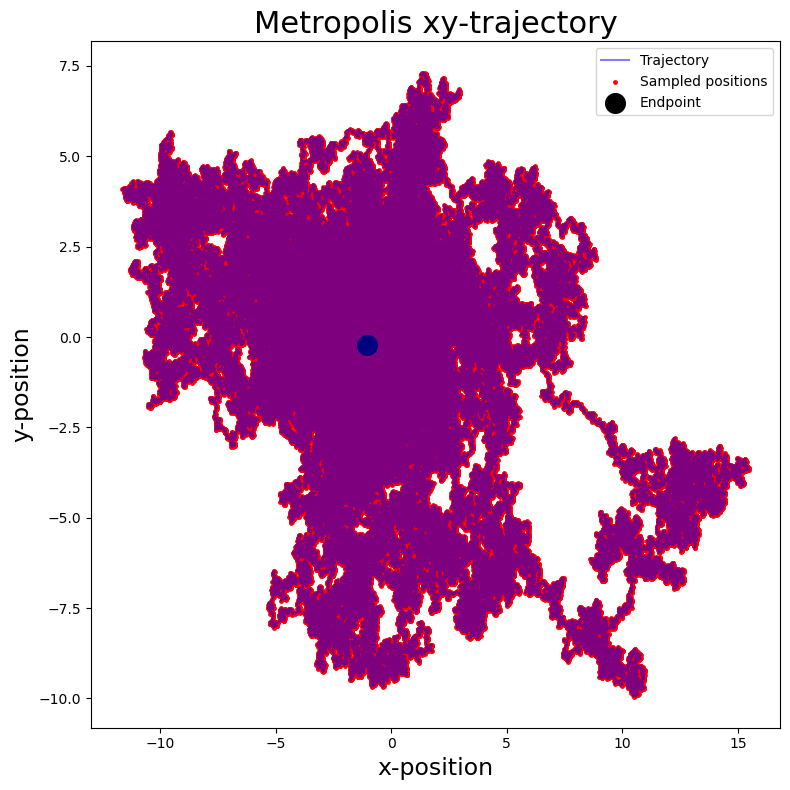

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_xlabel('x-position', fontsize=17)
ax.set_ylabel('y-position', fontsize=17)
ax.set_title('Metropolis xy-trajectory', fontsize=22)
ax.plot(positions_x, positions_y, color='blue', alpha=0.5, label='Trajectory')
ax.scatter(positions_x, positions_y, color='red', marker='o', s=6, label='Sampled positions')
ax.scatter(positions_x[-1], positions_y[-1], color='black', marker='o', s=200, label='Endpoint')
ax.legend()
plt.tight_layout()

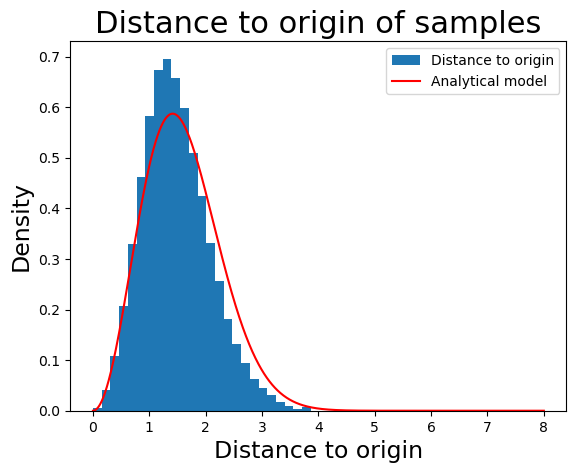

In [5]:
# Plot the distance to the center.
N = 1E6
r_initial_origin = np.array([0,0,0])

h = 1

# keep track of all positions
positions_x = np.zeros(int(N))
positions_y = np.zeros(int(N))
positions_z = np.zeros(int(N))

# add initial positions to the arrays.
positions_x[0] += r_initial_origin[0]
positions_y[0] += r_initial_origin[1]
positions_z[0] += r_initial_origin[2]

for n in range(1, int(N), 1):
    # Generate step from W_h
    delta_x = np.random.uniform(-h/2, h/2, 1)
    delta_y = np.random.uniform(-h/2, h/2, 1)
    delta_z = np.random.uniform(-h/2, h/2, 1)
    delta = np.array([delta_x, delta_y, delta_z]).flatten()

    #get new and old positions
    x_old = positions_x[n-1]
    y_old = positions_y[n-1]
    z_old = positions_z[n-1]
    
    r_old = np.array([x_old, y_old, z_old]).flatten()
    r_new = np.add(r_old, delta)
    
    # Metropolis algorithm

    distance = (np.sum(r_new**2)) - np.sqrt(np.sum(r_old**2))
    if distance < 0:
        positions_x[n] = r_new[0]
        positions_y[n] = r_new[1]
        positions_z[n] = r_new[2]
    else:
        u = np.random.uniform(0, 1, 1)
        A = np.exp(-distance/2)
        if u < A: # accept jump
            positions_x[n] = r_new[0]
            positions_y[n] = r_new[1]
            positions_z[n] = r_new[2]
        else:  # reject jump
            positions_x[n] = r_old[0]
            positions_y[n] = r_old[1]
            positions_z[n] = r_old[2]

# get distance to origin
distances = np.sqrt(positions_x**2 + positions_y**2 + positions_z**2)

# Plot histogram of distances
plt.hist(distances, 25, label='Distance to origin', density=True)

# Plot theoretical distribution
r = np.linspace(0, 8, 1000)
plt.plot(r, 4*np.pi*r**2*np.exp(-r**2/2)/np.sqrt(2*np.pi)**3, color='red', label='Analytical model')

plt.title('Distance to origin of samples', fontsize=22)
plt.xlabel('Distance to origin', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.legend()
plt.savefig('Plots/ex4_dist_origin')
plt.show()

$$
I = \frac{1}{N}\sum_{i=1}^N \frac{f(r_i)}{W(r_i)} = \frac{1}{N}\sum_{i=1}^N \frac{r_i^4\sin(\theta_i)(\cos(\theta_i)\sin(\phi_i)+ \sin(\theta_i)\sin(\phi_i)+ \cos(\phi_i))^2\exp(-\frac{r_i^2}{2})}{\frac{4\pi}{\sqrt{2\pi}^3}r_i^2\exp(-\frac{r_i^2}{2})}
$$
where we have transformed $f(x) = (x+y+z)**2 = r^2(\cos(\theta)\sin(\phi)+ \sin(\theta)\sin(\phi)+ \cos(\phi))^2$ to spherical coordinates. This gives for us to compute the corresponding angles $\theta_i, \phi_i$ and then the intergal can be computed as 
$$
\mathcal{I} = \frac{1}{N}\sum_{i=1}^N \frac{\sqrt{2\pi}^3}{4\pi} r_i^2\sin(\theta_i)(\cos(\theta_i)\sin(\phi_i)+ \sin(\theta_i)\sin(\phi_i)+ \cos(\phi_i))^2
$$

In [30]:
# estimate integral
def cartesian_to_spherical(x, y, z, r):
    """
    Convert Cartesian coordinates to spherical coordinates.
    Args:
        x, y, z: Arrays or lists of Cartesian coordinates.
        r: Array or list of radial distances.
    Returns:
        theta: Polar angles (in radians).
        phi: Azimuthal angles (in radians).
    """
    # Avoid division by zero for r
    theta = np.zeros(len(x))
    phi = np.zeros(len(x))
    for k in range(len(x)):
        if r[k] > 0.01:
            theta[k] = np.arccos(z[k] / r[k])  
            phi[k] = np.arctan2(y[k], x[k])  
    return theta, phi

theta, phi = cartesian_to_spherical(positions_x, positions_y, positions_z, distances)
print(len(theta))
print(len(distances))

1000000
1000000


In [31]:
integral = 0
for k in range(len(distances)):
    integral += (np.cos(theta[k])*np.sin(phi[k]) + np.sin(theta[k])*np.sin(phi[k]) + np.cos(phi[k]))**2*np.sin(theta[k])*distances[k]**2
print(integral)

1989319.8082492235


In [36]:
print(integral*np.sqrt(2*np.pi)**3/len(distances)*1)

31.33101103722458


In [14]:
print(len(positions_x))

1000000


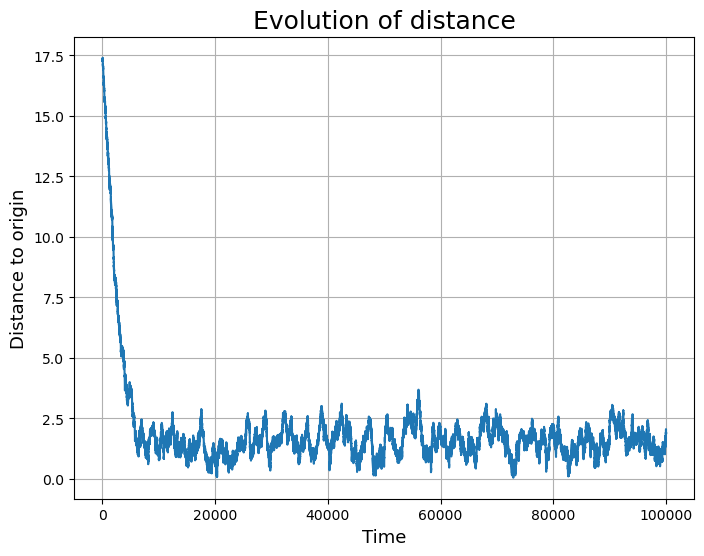

In [61]:
# equilibration time
# Plot the distance to the center.
N = 1E5
r_initial_origin = np.array([10,10,10])

h = 0.1

# keep track of all positions
positions_x = np.zeros(int(N))
positions_y = np.zeros(int(N))
positions_z = np.zeros(int(N))

# add initial positions to the arrays.
positions_x[0] += r_initial_origin[0]
positions_y[0] += r_initial_origin[1]
positions_z[0] += r_initial_origin[2]

for n in range(1, int(N), 1):
    # Generate step from W_h
    delta_x = np.random.uniform(-h/2, h/2, 1)
    delta_y = np.random.uniform(-h/2, h/2, 1)
    delta_z = np.random.uniform(-h/2, h/2, 1)
    delta = np.array([delta_x, delta_y, delta_z])
  

    #get new and old positions
    x_old = positions_x[n-1]
    y_old = positions_y[n-1]
    z_old = positions_z[n-1]
    
    
    x_new = x_old + delta_x
    y_new = y_old + delta_y
    z_new = z_old + delta_z
    
    # Metropolis algorithm
  
    distance = (x_old+delta_x)**2 + (y_old+delta_y)**2 + (z_old+delta_z)**2 - z_old**2 - y_old**2 - x_old**2
  
    if distance < 0:
        positions_x[n] = x_new
        positions_y[n] = y_new
        positions_z[n] = z_new
    else:
        u = np.random.uniform(0, 1, 1)
        A = np.exp(-distance/2)
        if u < A: # accept jump
            positions_x[n] = x_new
            positions_y[n] = y_new
            positions_z[n] = z_new
        else:  # reject jump
            positions_x[n] = x_old
            positions_y[n] = y_old
            positions_z[n] = z_old
            


# get distance to origin
distances = np.sqrt(positions_x**2 + positions_y**2 + positions_z**2)
time = np.linspace(0, len(distances), len(distances))

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(time, distances)
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Distance to origin', fontsize=13)
ax.set_title('Evolution of distance', fontsize=18)
ax.grid()
fig.savefig('Plots/ex4_equilibration_h_01.png', dpi=300)

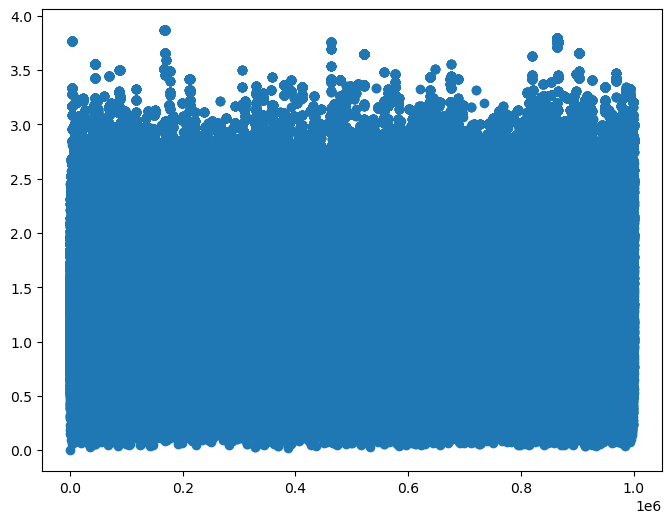

In [38]:
# get distance to origin
distances = np.sqrt(positions_x**2 + positions_y**2 + positions_z**2)
time = np.linspace(0, len(distances), len(distances))

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(time, distances)

In [41]:
print(distances)

[17.32050808 17.32050808 17.32050808 ... 17.32050808 17.32050808
 17.32050808]
